In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Doing Separately All the Steps Required for Understanding

In [20]:
f=open('WhatsApp Chat with Professional bunkers.txt','r',encoding='utf-8')

In [21]:
data=f.read()

In [22]:
lines =[]
with open('WhatsApp Chat with Professional bunkers.txt','r',encoding='utf-8') as f:
    lines.extend(f.readline() for i in range(5))
lines

['19/11/22, 7:58\u202fpm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '18/11/22, 10:50\u202fpm - Geetzzz✨ created group " ECE-3rd \'A\' Unofficial "\n',
 "19/11/22, 7:58\u202fpm - You joined using this group's invite link\n",
 "19/11/22, 8:39\u202fpm - +91 91429 91042 joined using this group's invite link\n",
 "19/11/22, 10:02\u202fpm - +91 91661 25570 joined using this group's invite link\n"]

In [24]:
pattern='\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s\w{1,2}\s-\s'
messages=re.split(pattern,data)[1:]
messages[0:5]

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Geetzzz✨ created group " ECE-3rd \'A\' Unofficial "\n',
 "You joined using this group's invite link\n",
 "+91 91429 91042 joined using this group's invite link\n",
 "+91 91661 25570 joined using this group's invite link\n"]

In [25]:
dates=re.findall(pattern,data)
dates[0:5]

['19/11/22, 7:58\u202fpm - ',
 '18/11/22, 10:50\u202fpm - ',
 '19/11/22, 7:58\u202fpm - ',
 '19/11/22, 8:39\u202fpm - ',
 '19/11/22, 10:02\u202fpm - ']

In [6]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%y, %I:%M %p - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.tail()

,user_message,date
3429,+91 99003 02123: <Media omitted>\n,2023-02-08 15:21:00
3430,Geetzzz✨: Yes classes are goin on\n,2023-02-08 15:25:00
3431,+91 99003 02123: <Media omitted>\n,2023-02-08 15:29:00
3432,Aditya Classmate: Anyone finished record?\n,2023-02-08 22:30:00
3433,Vardhini Surepally🌺: Na\n,2023-02-08 22:30:00


In [7]:
df.shape

(3434, 2)

In [8]:
usernames=[]
msgs=[]
for messages in df['user_message']:
    entry=re.split('([\w\W]+?):\s',messages)
    if entry[1:]:
        usernames.append(entry[1])
        msgs.append(entry[2])
    else:
        usernames.append('group notification')
        msgs.append(entry[0])
df['user']=usernames
df['message']=msgs
df.drop(columns=['user_message'],inplace=True)
df.tail()

,date,user,message
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>\n
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on\n
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>\n
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?\n
3433,2023-02-08 22:30:00,Vardhini Surepally🌺,Na\n


In [9]:
df.tail()

,date,user,message
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>\n
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on\n
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>\n
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?\n
3433,2023-02-08 22:30:00,Vardhini Surepally🌺,Na\n


In [10]:
df['year']=df['date'].dt.year

In [11]:
df['month']=df['date'].dt.month_name()

In [12]:
df['day']=df['date'].dt.day

In [13]:
df['hour']=df['date'].dt.hour

In [14]:
df['minute']=df['date'].dt.minute

In [15]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-11-19 19:58:00,group notification,Messages and calls are end-to-end encrypted. N...,2022,November,19,19,58
1,2022-11-18 22:50:00,group notification,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia...",2022,November,18,22,50
2,2022-11-19 19:58:00,group notification,You joined using this group's invite link\n,2022,November,19,19,58
3,2022-11-19 20:39:00,group notification,+91 91429 91042 joined using this group's invi...,2022,November,19,20,39
4,2022-11-19 22:02:00,group notification,+91 91661 25570 joined using this group's invi...,2022,November,19,22,2


In [16]:
df['user'].unique()

array(['group notification', 'Aryan', 'Gnanendri', '+91 99003 02123',
       'Geetzzz✨', 'Akash', '+91 96635 11616', '+91 97319 90173',
       '+91 6363 473 664', '+91 6366 512 862', 'Anurag Shirish',
       'Vardhini Surepally🌺', '+91 87073 60996', '+91 94817 22410',
       '+91 97395 22205', '+91 87460 30964', '+91 96063 37006',
       '+91 72593 96367', '+91 74119 73464', 'Abhishek Singh',
       '+91 92644 99539', '+91 99457 73644', '+91 6394 238 091',
       '+91 6366 604 557', '+91 95917 40345', '+91 95133 43256',
       '+91 91088 52465', '+91 6362 382 724', '+91 91488 20754',
       'Bavitesh', 'Ankur', '+91 93803 50749', '+91 79757 06805',
       '+91 93920 40584', '+91 72046 10156', 'Aditya Classmate',
       '+91 99028 45195', '+91 89717 98134', '+91 88244 44051', 'Harsh',
       '+91 80739 08481', '+91 88841 93613', '+91 91429 91042',
       '+91 90084 87456', '+91 96067 61122', 'Ashish NMIT',
       '+91 91661 25570', '+91 73376 17479', '+91 89046 63051',
       '+91 86185

# Combining Everything Into a Function

In [17]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}\/\d{1,2}\/\d{2,4},\s\d{1,2}:\d{1,2}\s\w{1,2}\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r',encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [18]:
df=rawToDf('WhatsApp Chat with Professional bunkers.txt','12hr')

In [19]:
df

,date_time,user,msg
0,2022-11-19 19:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...
1,2022-11-18 22:50:00,grp_notif,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia..."
2,2022-11-19 19:58:00,grp_notif,You joined using this group's invite link
3,2022-11-19 20:39:00,grp_notif,+91 91429 91042 joined using this group's invi...
4,2022-11-19 22:02:00,grp_notif,+91 91661 25570 joined using this group's invi...
...,...,...,...
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?


In [20]:
df['user'].unique()

array(['grp_notif', 'Aryan', 'Gnanendri', '+91 99003 02123', 'Geetzzz✨',
       'Akash', '+91 96635 11616', '+91 97319 90173', '+91 6363 473 664',
       '+91 6366 512 862', 'Anurag Shirish', 'Vardhini Surepally🌺',
       '+91 87073 60996', '+91 94817 22410', '+91 97395 22205',
       '+91 87460 30964', '+91 96063 37006', '+91 72593 96367',
       '+91 74119 73464', 'Abhishek Singh', '+91 92644 99539',
       '+91 99457 73644', '+91 6394 238 091', '+91 6366 604 557',
       '+91 95917 40345', '+91 95133 43256', '+91 91088 52465',
       '+91 6362 382 724', '+91 91488 20754', 'Bavitesh', 'Ankur',
       '+91 93803 50749', '+91 79757 06805', '+91 93920 40584',
       '+91 72046 10156', 'Aditya Classmate', '+91 99028 45195',
       '+91 89717 98134', '+91 88244 44051', 'Harsh', '+91 80739 08481',
       '+91 88841 93613', '+91 91429 91042', '+91 90084 87456',
       '+91 96067 61122', 'Ashish NMIT', '+91 91661 25570',
       '+91 73376 17479', '+91 89046 63051', '+91 86185 23583',
       

In [21]:
df['year']=df['date_time'].dt.year
df['month']=df['date_time'].dt.month_name()
df['day']=df['date_time'].dt.day
df['hour']=df['date_time'].dt.hour
df['minute']=df['date_time'].dt.minute

In [22]:
df

,date_time,user,msg,year,month,day,hour,minute
0,2022-11-19 19:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...,2022,November,19,19,58
1,2022-11-18 22:50:00,grp_notif,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia...",2022,November,18,22,50
2,2022-11-19 19:58:00,grp_notif,You joined using this group's invite link,2022,November,19,19,58
3,2022-11-19 20:39:00,grp_notif,+91 91429 91042 joined using this group's invi...,2022,November,19,20,39
4,2022-11-19 22:02:00,grp_notif,+91 91661 25570 joined using this group's invi...,2022,November,19,22,2
...,...,...,...,...,...,...,...,...
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>,2023,February,8,15,21
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on,2023,February,8,15,25
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>,2023,February,8,15,29
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?,2023,February,8,22,30


In [23]:
# rather than this we can also use
df['year']=df['date_time'].dt.strftime('%Y')
df['month']=df['date_time'].dt.strftime('%B')
df['day']=df['date_time'].dt.strftime('%A')
df['hour']=df['date_time'].dt.strftime('%H')
df['minute']=df['date_time'].dt.strftime('%M')
df['date']=df['date_time'].apply(lambda x:x.date())

In [24]:
df.head()

,date_time,user,msg,year,month,day,hour,minute,date
0,2022-11-19 19:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...,2022,November,Saturday,19,58,2022-11-19
1,2022-11-18 22:50:00,grp_notif,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia...",2022,November,Friday,22,50,2022-11-18
2,2022-11-19 19:58:00,grp_notif,You joined using this group's invite link,2022,November,Saturday,19,58,2022-11-19
3,2022-11-19 20:39:00,grp_notif,+91 91429 91042 joined using this group's invi...,2022,November,Saturday,20,39,2022-11-19
4,2022-11-19 22:02:00,grp_notif,+91 91661 25570 joined using this group's invi...,2022,November,Saturday,22,02,2022-11-19


# Checking the frequency of total messages on the group

In [25]:
new_df=df.copy()

In [26]:
new_df['message_count']=new_df.shape[0]*[1]
new_df

,date_time,user,msg,year,month,day,hour,minute,date,message_count
0,2022-11-19 19:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...,2022,November,Saturday,19,58,2022-11-19,1
1,2022-11-18 22:50:00,grp_notif,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia...",2022,November,Friday,22,50,2022-11-18,1
2,2022-11-19 19:58:00,grp_notif,You joined using this group's invite link,2022,November,Saturday,19,58,2022-11-19,1
3,2022-11-19 20:39:00,grp_notif,+91 91429 91042 joined using this group's invi...,2022,November,Saturday,20,39,2022-11-19,1
4,2022-11-19 22:02:00,grp_notif,+91 91661 25570 joined using this group's invi...,2022,November,Saturday,22,02,2022-11-19,1
...,...,...,...,...,...,...,...,...,...,...
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>,2023,February,Wednesday,15,21,2023-02-08,1
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on,2023,February,Wednesday,15,25,2023-02-08,1
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>,2023,February,Wednesday,15,29,2023-02-08,1
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?,2023,February,Wednesday,22,30,2023-02-08,1


In [27]:
new_df=new_df.groupby('date').sum().reset_index()
new_df

,date,message_count
0,2022-11-18,1
1,2022-11-19,5
2,2022-11-20,1
3,2022-11-21,18
4,2022-11-22,8
...,...,...
76,2023-02-04,5
77,2023-02-05,59
78,2023-02-06,44
79,2023-02-07,8


<AxesSubplot:title={'center':'overall frequency of total messages on the group'}, xlabel='date', ylabel='message_count'>

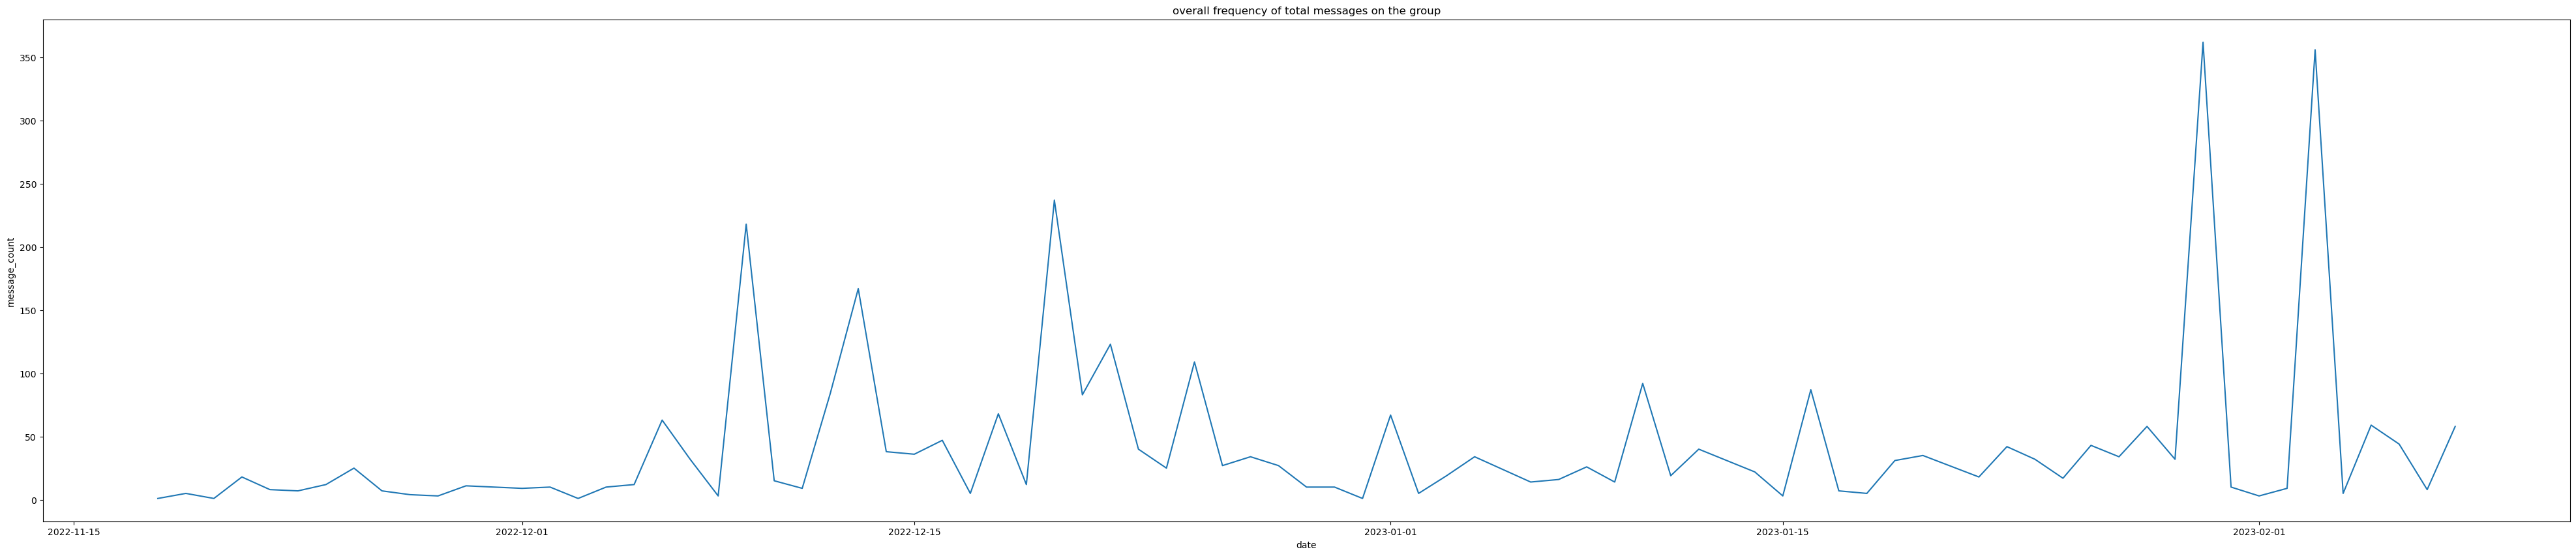

In [28]:
plt.figure(figsize=(50,10))
plt.title('overall frequency of total messages on the group')
sns.lineplot(new_df.date,new_df.message_count)

# Check top 10 most active days of messaging

In [29]:
top10days=new_df.sort_values(by='message_count',ascending=False).head(10)
top10days.reset_index(inplace=True)
top10days.drop(columns='index',inplace=True)

In [30]:
 top10days

,date,message_count
0,2023-01-30,362
1,2023-02-03,356
2,2022-12-20,237
3,2022-12-09,218
4,2022-12-13,167
5,2022-12-22,123
6,2022-12-25,109
7,2023-01-10,92
8,2023-01-16,87
9,2022-12-12,84


<AxesSubplot:title={'center':'Check top 10 most active days of messaging'}, xlabel='date', ylabel='message_count'>

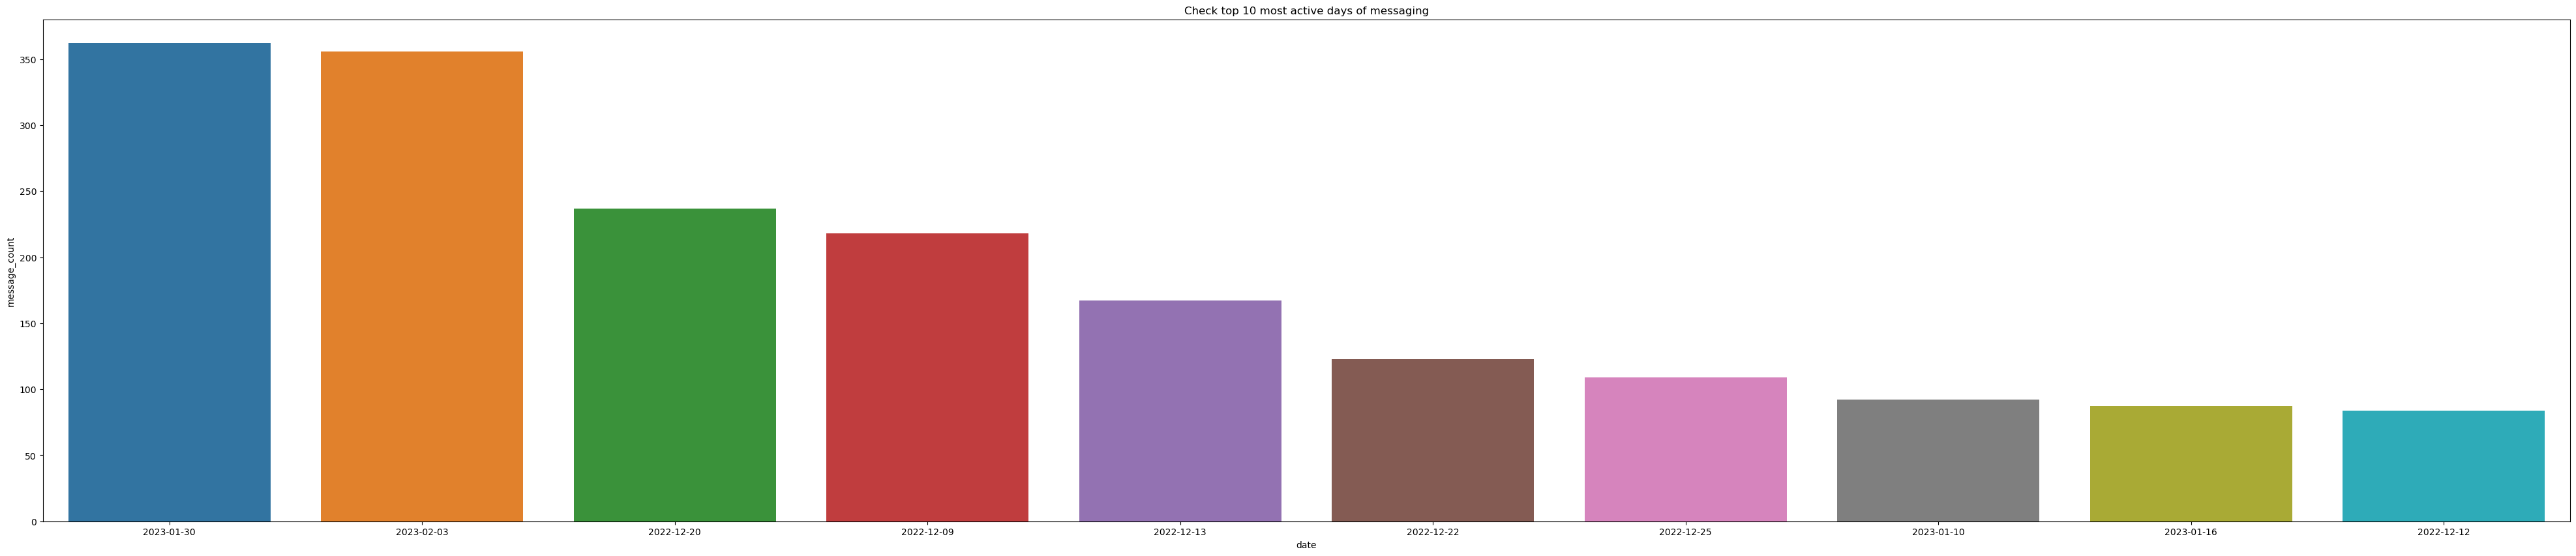

In [31]:
plt.figure(figsize=(50,10))
plt.title('Check top 10 most active days of messaging')
sns.barplot(top10days.date,top10days.message_count)

# Top 10 active users in the group

In [32]:
df2=df.copy()
df2=df2[df2.user!='grp_notif']
df2

,date_time,user,msg,year,month,day,hour,minute,date
6,2022-11-20 14:30:00,Aryan,6 months LinkedIn premium for all students 💥 A...,2022,November,Sunday,14,30,2022-11-20
7,2022-11-21 07:55:00,Gnanendri,<Media omitted>,2022,November,Monday,07,55,2022-11-21
8,2022-11-21 08:47:00,+91 99003 02123,People who shifted from other class should be ...,2022,November,Monday,08,47,2022-11-21
9,2022-11-21 08:47:00,+91 99003 02123,?*,2022,November,Monday,08,47,2022-11-21
10,2022-11-21 08:48:00,Geetzzz✨,If you have not attended the lab earlier thn a...,2022,November,Monday,08,48,2022-11-21
...,...,...,...,...,...,...,...,...,...
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>,2023,February,Wednesday,15,21,2023-02-08
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on,2023,February,Wednesday,15,25,2023-02-08
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>,2023,February,Wednesday,15,29,2023-02-08
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?,2023,February,Wednesday,22,30,2023-02-08


In [33]:
top10users=df2.groupby('user')['msg'].count().sort_values(ascending=False)
top10users=top10users.head(10).reset_index()
top10users

,user,msg
0,Vardhini Surepally🌺,419
1,+91 70227 47134,387
2,Geetzzz✨,340
3,+91 99003 02123,268
4,+91 6363 473 664,180
5,+91 93803 50749,155
6,+91 6362 382 724,150
7,Aditya Classmate,133
8,+91 72593 96367,128
9,+91 6360 348 424,116


<AxesSubplot:title={'center':'Top 10 active users in the group'}, xlabel='user', ylabel='msg'>

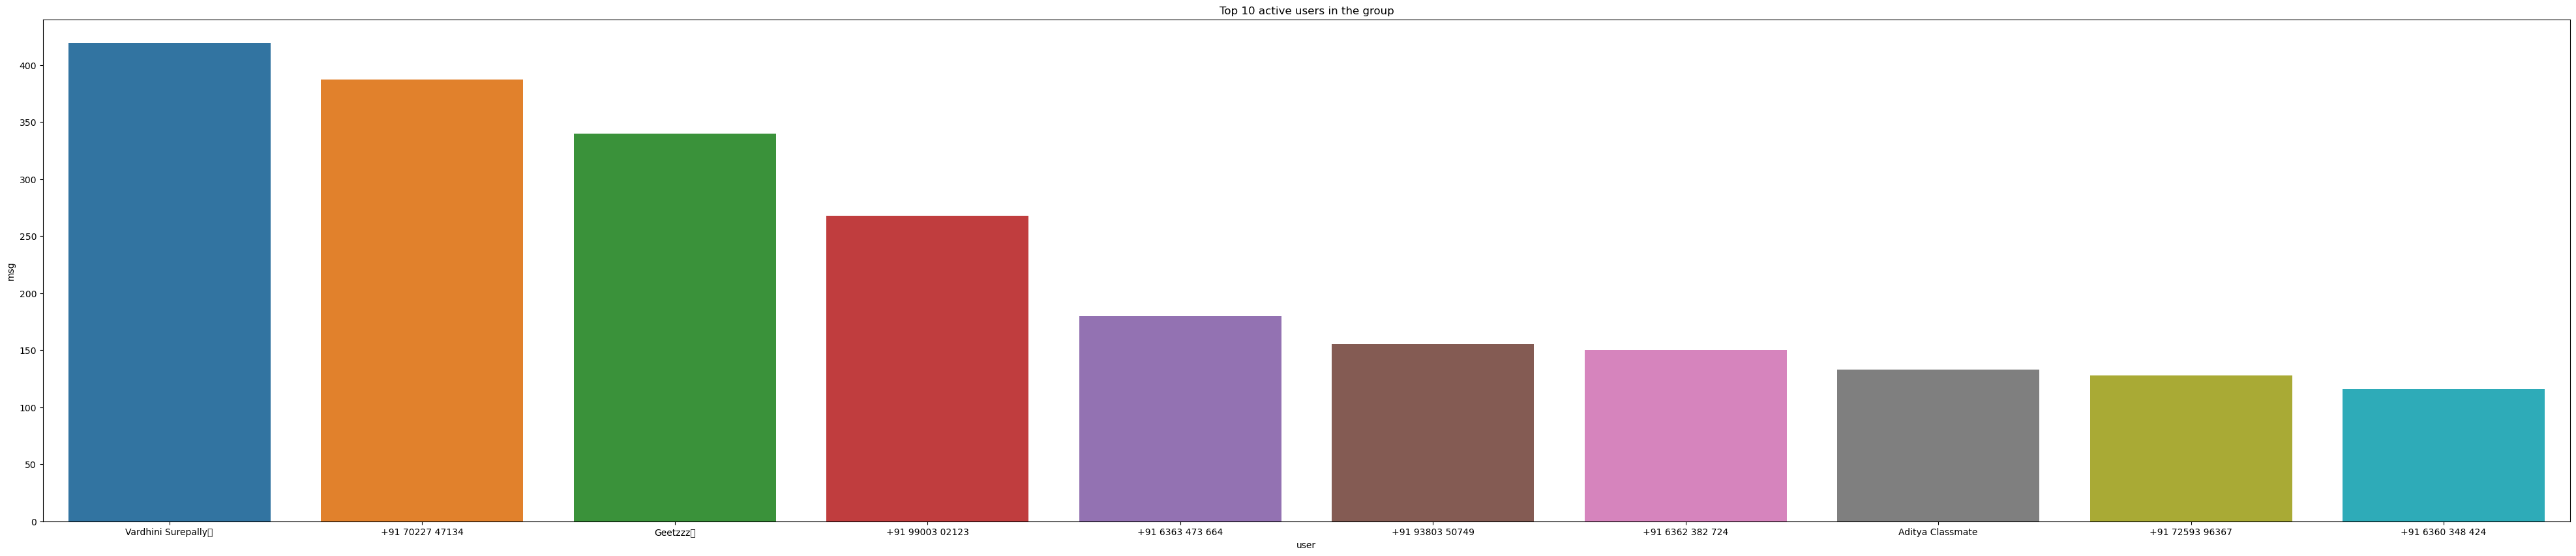

In [34]:
plt.figure(figsize=(50,10))
plt.title('Top 10 active users in the group')
sns.barplot(top10users.user,top10users.msg)

## Finding out ghosts/Inactive members in the group

In [35]:
df2=df.copy()
df2=df2[df2.user!='grp_notif']
df2
last10users=df2.groupby('user')['msg'].count().sort_values(ascending=True)
last10users=last10users.head(20).reset_index()
last10users

,user,msg
0,+91 91429 91042,1
1,Kuldeep NMIT ECE,1
2,+91 98351 87393,1
3,+91 70235 51203,1
4,+91 73532 89315,2
5,+91 80739 08481,2
6,+91 91488 20754,3
7,+91 73497 53679,3
8,+91 89715 83343,3
9,+91 70014 55026,3


<AxesSubplot:title={'center':'Finding out ghosts/Inactive members in the group'}, xlabel='user', ylabel='msg'>

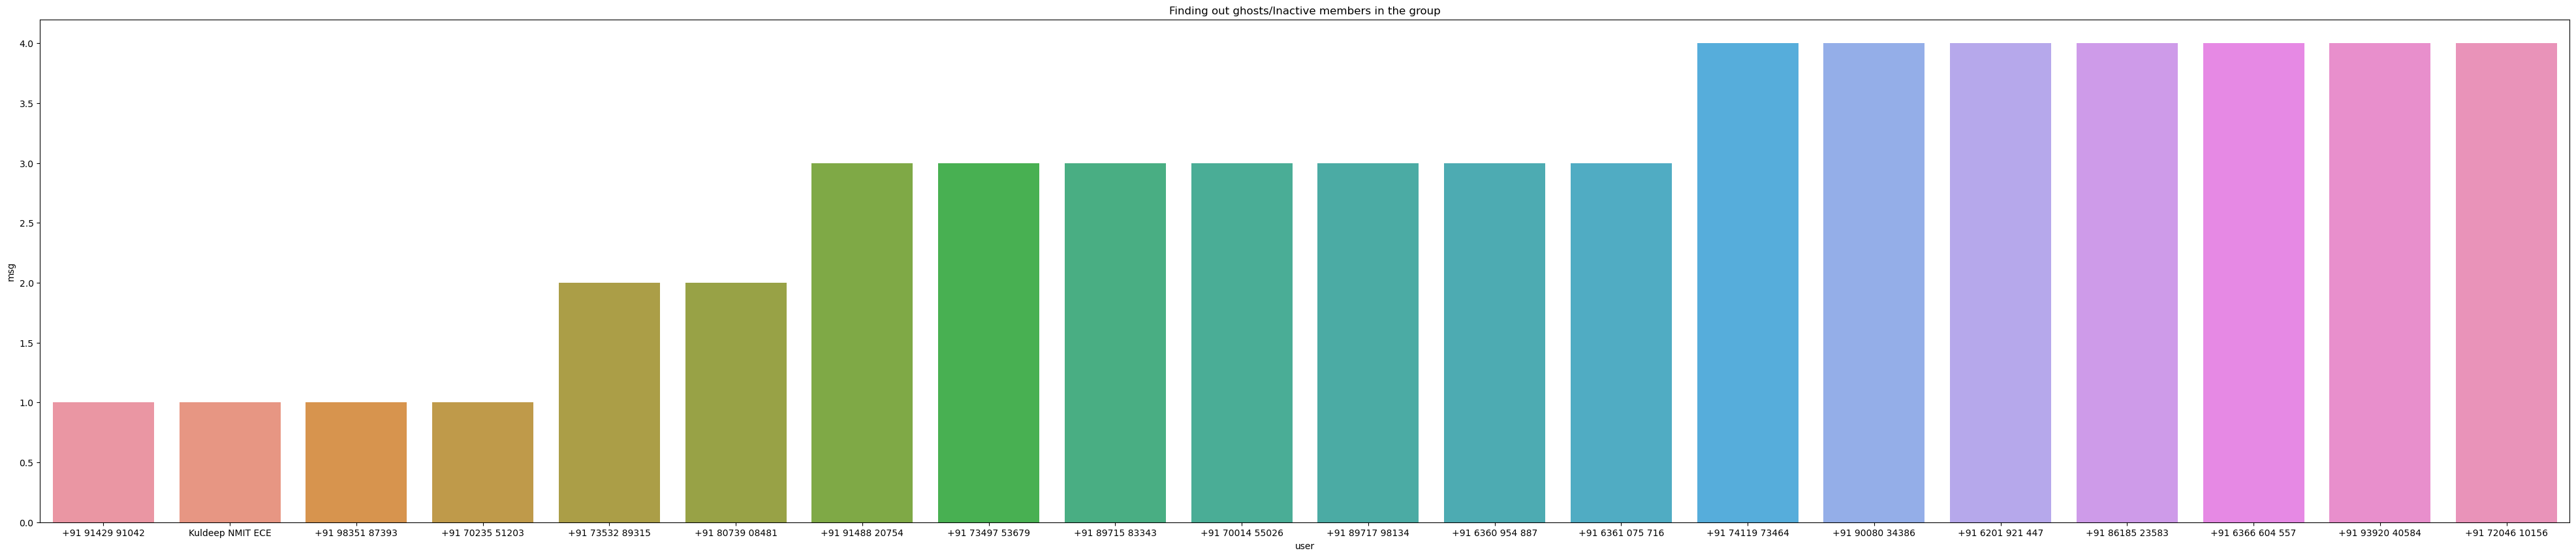

In [36]:
plt.figure(figsize=(50,10))
plt.title('Finding out ghosts/Inactive members in the group')
sns.barplot(last10users.user,last10users.msg)

# Checking Top 10 users most sent media

In [37]:
top10media=df[df.msg=='<Media omitted> '].groupby('user').count().sort_values(by='msg',ascending=False).head(10)
top10media.drop(columns=['date_time','year','month','day','hour','minute','date'],inplace=True)
top10media.rename(columns={'msg':'media_sent'},inplace=True)
top10media.reset_index(inplace=True)
top10media

,user,media_sent
0,+91 70227 47134,94
1,Geetzzz✨,74
2,Vardhini Surepally🌺,73
3,+91 99003 02123,39
4,Gnanendri,29
5,+91 6366 512 862,22
6,Aditya Classmate,21
7,+91 93803 50749,15
8,+91 6363 473 664,15
9,Aryan,14


<AxesSubplot:title={'center':'Checking Top 10 users most sent media'}, xlabel='user', ylabel='media_sent'>

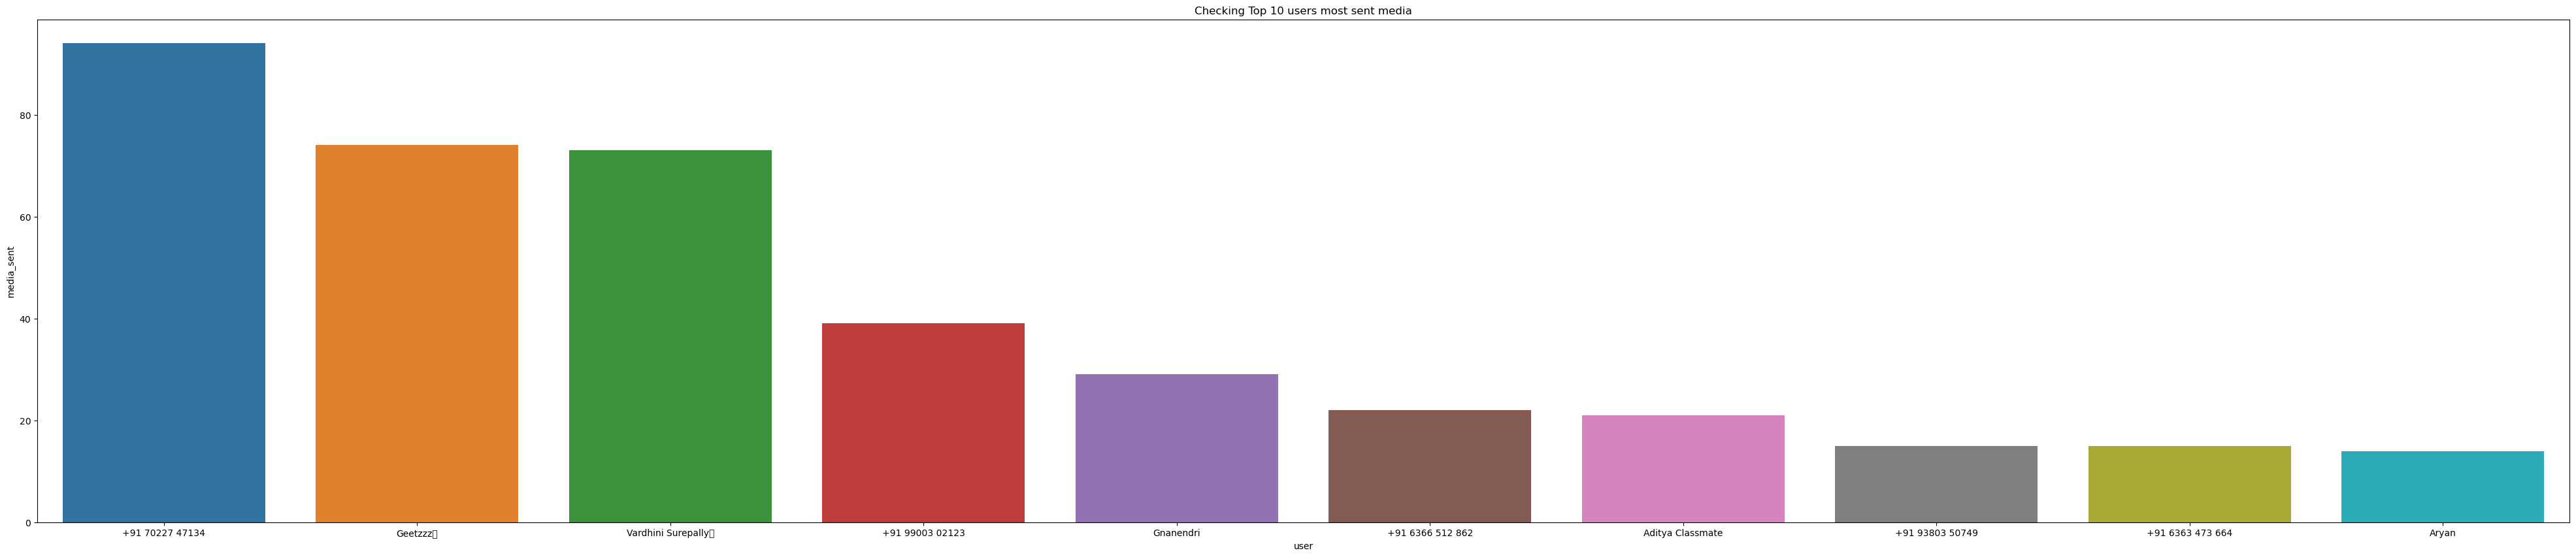

In [38]:
plt.figure(figsize=(50,10))
plt.title('Checking Top 10 users most sent media')
sns.barplot(top10media.user,top10media.media_sent)

# Most Active Hours

In [39]:
df3=df.copy()
df3['message_count']=[1]*df.shape[0]
df3['hours']=df3['date_time'].apply(lambda x:x.hour)
grouped_by_time=df3.groupby('hours').sum().reset_index().sort_values(by='hours')
grouped_by_time

,hours,message_count
0,0,24
1,1,6
2,5,1
3,7,7
4,8,107
5,9,60
6,10,262
7,11,161
8,12,175
9,13,113


<AxesSubplot:title={'center':'Most Active Hours '}, xlabel='message_count', ylabel='hours'>

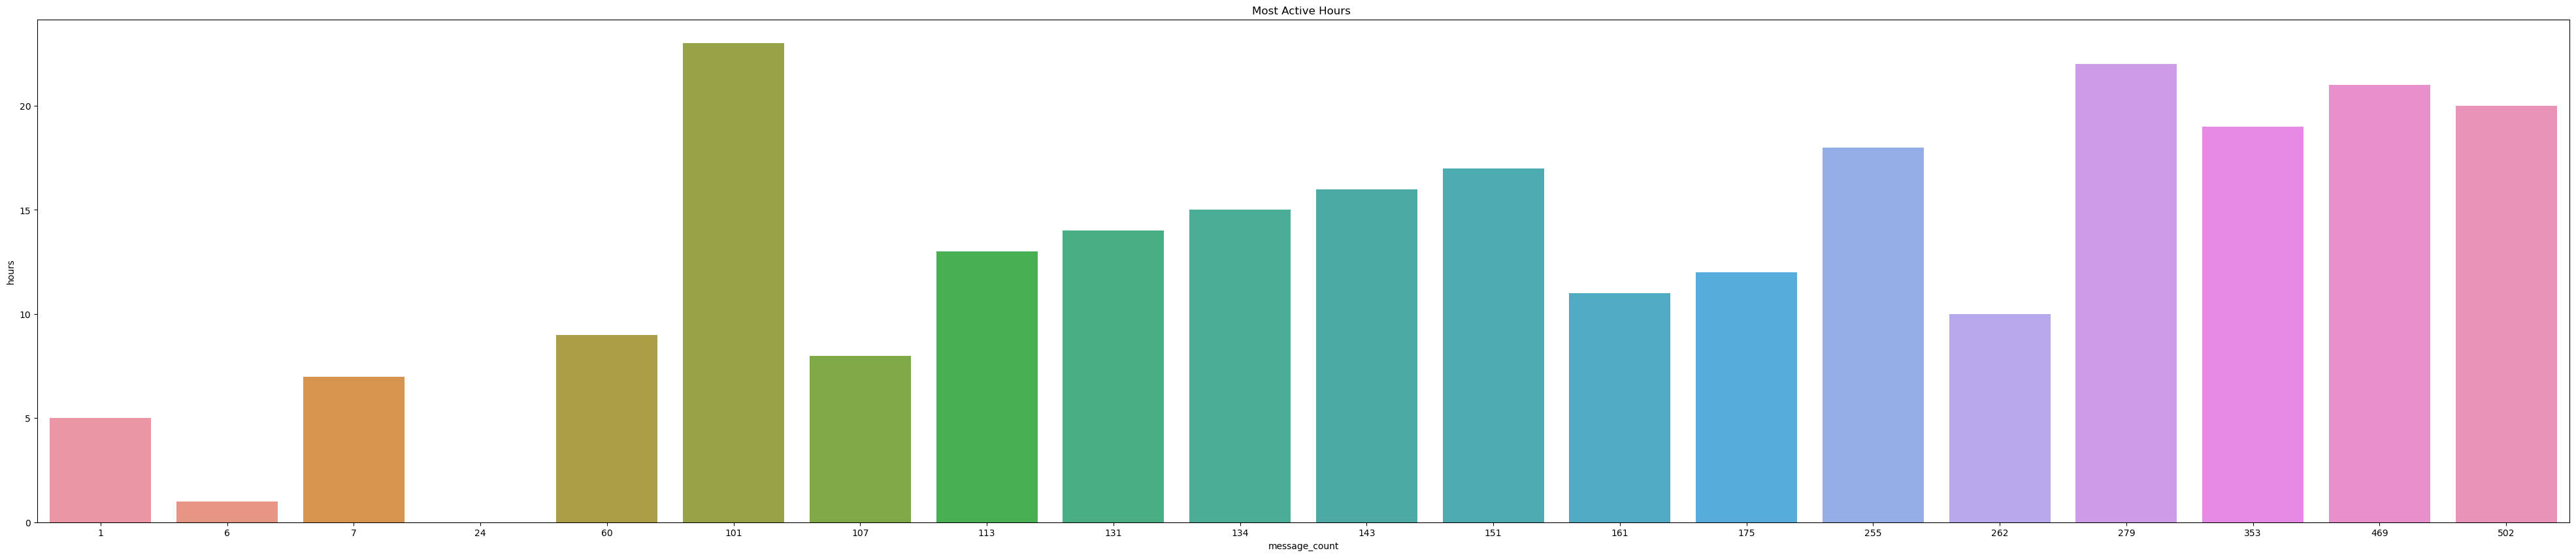

In [40]:
plt.figure(figsize=(50,10))
plt.title('Most Active Hours ')
sns.barplot(grouped_by_time.message_count,grouped_by_time.hours)

# Most Active Days

In [41]:
df3

,date_time,user,msg,year,month,day,hour,minute,date,message_count,hours
0,2022-11-19 19:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...,2022,November,Saturday,19,58,2022-11-19,1,19
1,2022-11-18 22:50:00,grp_notif,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia...",2022,November,Friday,22,50,2022-11-18,1,22
2,2022-11-19 19:58:00,grp_notif,You joined using this group's invite link,2022,November,Saturday,19,58,2022-11-19,1,19
3,2022-11-19 20:39:00,grp_notif,+91 91429 91042 joined using this group's invi...,2022,November,Saturday,20,39,2022-11-19,1,20
4,2022-11-19 22:02:00,grp_notif,+91 91661 25570 joined using this group's invi...,2022,November,Saturday,22,02,2022-11-19,1,22
...,...,...,...,...,...,...,...,...,...,...,...
3429,2023-02-08 15:21:00,+91 99003 02123,<Media omitted>,2023,February,Wednesday,15,21,2023-02-08,1,15
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on,2023,February,Wednesday,15,25,2023-02-08,1,15
3431,2023-02-08 15:29:00,+91 99003 02123,<Media omitted>,2023,February,Wednesday,15,29,2023-02-08,1,15
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?,2023,February,Wednesday,22,30,2023-02-08,1,22


In [42]:
grouped_by_day=df3.groupby('day').sum().reset_index().sort_values(by='message_count',ascending=False)
grouped_by_day

,day,message_count,hours
0,Friday,821,14609
1,Monday,710,11898
5,Tuesday,688,11895
3,Sunday,406,7072
6,Wednesday,333,4703
4,Thursday,316,4874
2,Saturday,160,2711


<AxesSubplot:title={'center':'Most Active Days '}, xlabel='day', ylabel='message_count'>

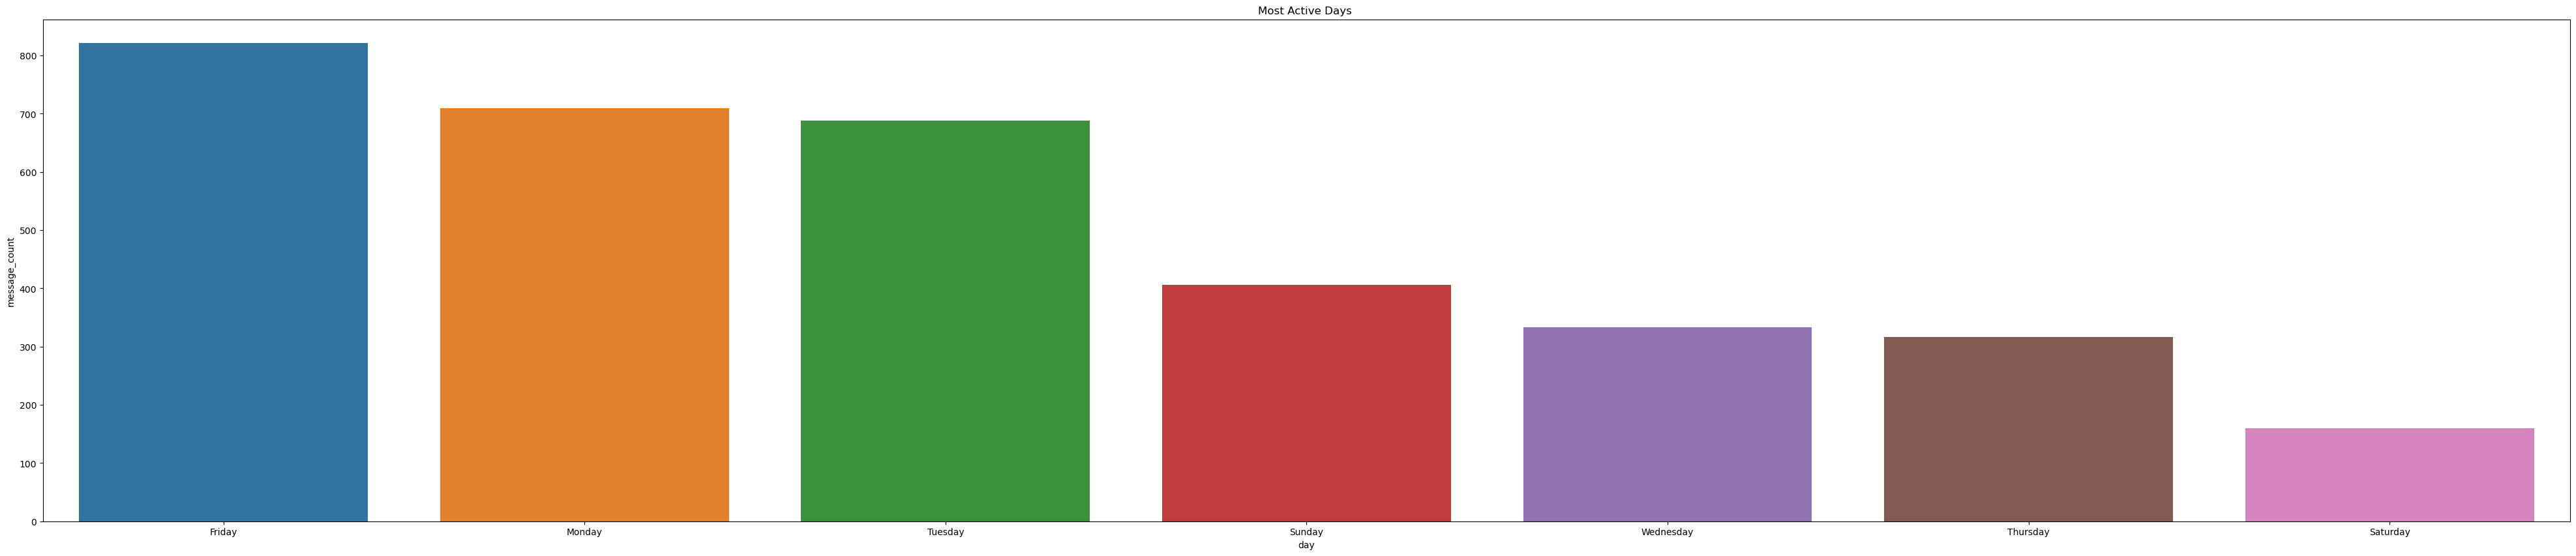

In [43]:
plt.figure(figsize=(50,10))
plt.title('Most Active Days ')
sns.barplot(grouped_by_day.day,grouped_by_day.message_count)

## Most active months

In [44]:
grouped_by_month=df3.groupby('month').sum().reset_index()[['month','message_count']]
grouped_by_month

,month,message_count
0,December,1565
1,February,542
2,January,1215
3,November,112


<AxesSubplot:title={'center':'Most active monthgrouped_by_months '}, xlabel='month', ylabel='message_count'>

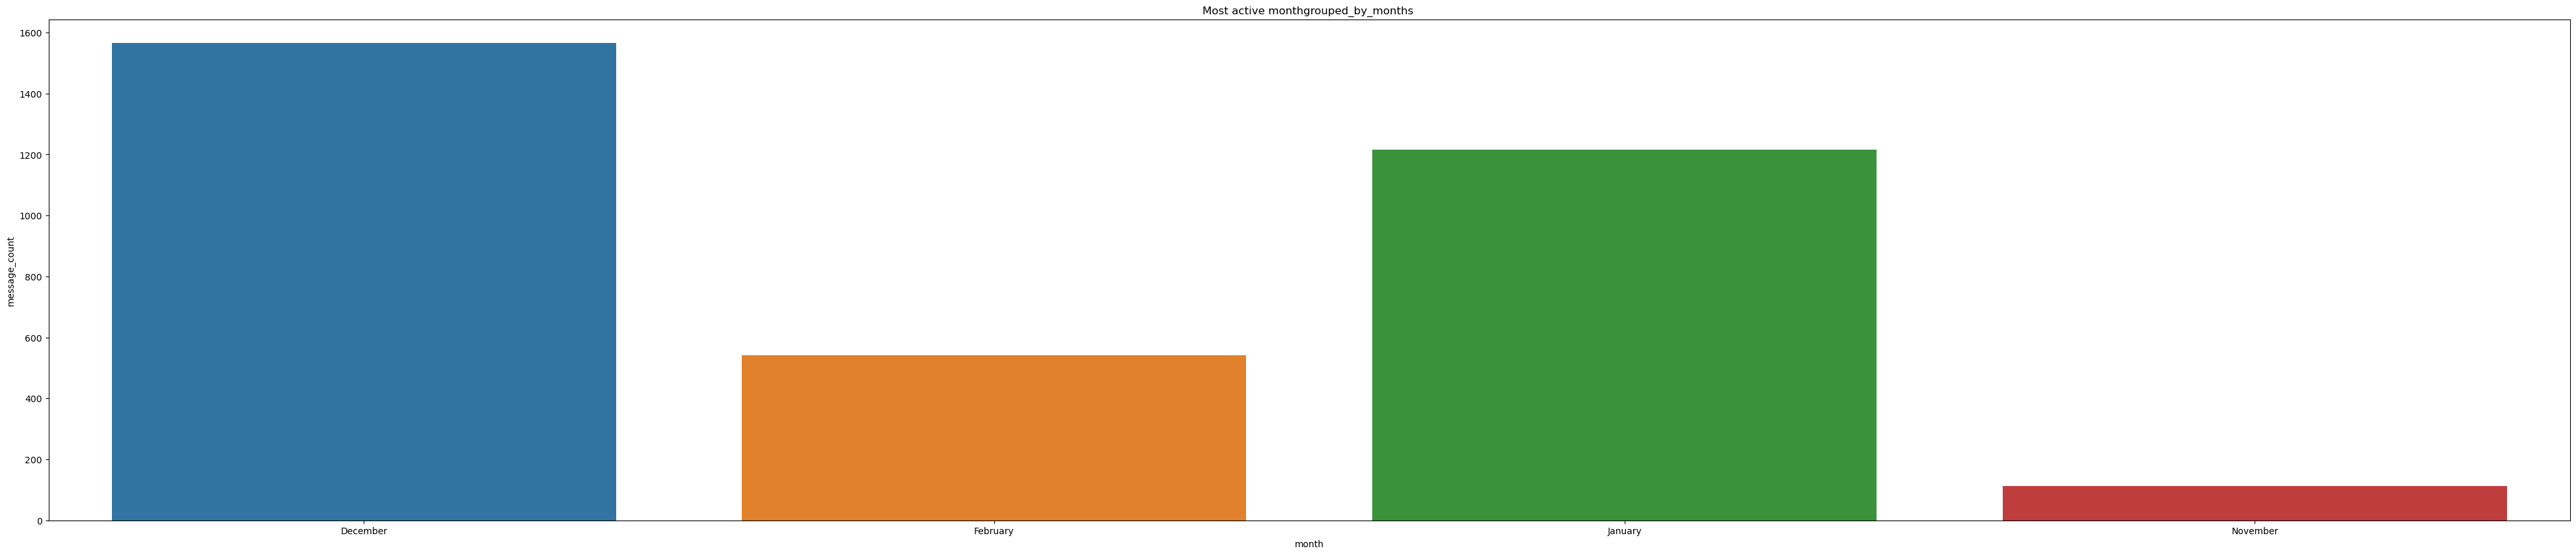

In [45]:
plt.figure(figsize=(50,10))
plt.title('Most active monthgrouped_by_months ')
sns.barplot(grouped_by_month.month,grouped_by_month.message_count)

In [46]:
media_messages_df=df[df.msg=='<Media omitted> ']
messages_df=df.drop(media_messages_df.index)
messages_df['Letter_Count']=messages_df['msg'].apply(lambda s: len(s))
messages_df['Word_Count']=messages_df['msg'].apply(lambda s:len(s.split(' ')))
messages_df

,date_time,user,msg,year,month,day,hour,minute,date,Letter_Count,Word_Count
0,2022-11-19 19:58:00,grp_notif,Messages and calls are end-to-end encrypted. N...,2022,November,Saturday,19,58,2022-11-19,140,26
1,2022-11-18 22:50:00,grp_notif,"Geetzzz✨ created group "" ECE-3rd 'A' Unofficia...",2022,November,Friday,22,50,2022-11-18,50,9
2,2022-11-19 19:58:00,grp_notif,You joined using this group's invite link,2022,November,Saturday,19,58,2022-11-19,42,8
3,2022-11-19 20:39:00,grp_notif,+91 91429 91042 joined using this group's invi...,2022,November,Saturday,20,39,2022-11-19,54,10
4,2022-11-19 22:02:00,grp_notif,+91 91661 25570 joined using this group's invi...,2022,November,Saturday,22,02,2022-11-19,54,10
...,...,...,...,...,...,...,...,...,...,...,...
3427,2023-02-08 15:14:00,+91 73497 53679,Do we have?,2023,February,Wednesday,15,14,2023-02-08,12,4
3428,2023-02-08 15:14:00,Geetzzz✨,Idk,2023,February,Wednesday,15,14,2023-02-08,4,2
3430,2023-02-08 15:25:00,Geetzzz✨,Yes classes are goin on,2023,February,Wednesday,15,25,2023-02-08,24,6
3432,2023-02-08 22:30:00,Aditya Classmate,Anyone finished record?,2023,February,Wednesday,22,30,2023-02-08,24,4


In [47]:
l=['Aryan','Aditya Classmate','Gnanendri','Vardhini Surepally🌺','Geetzzz✨']
for i in range(len(l)):
    req_df=messages_df[messages_df['user']==l[i]]
    print(f'Stats of {l[i]}')
    print('Total messages sent',req_df.shape[0])
    words_per_message=(np.sum(req_df['Word_Count']))/req_df.shape[0]
    print('Average words per message',words_per_message)
    media=media_messages_df[media_messages_df['user']==l[i]].shape[0]
    print('Media messsages sent',media)
    print('========')

Stats of Aryan
Total messages sent 44
Average words per message 13.681818181818182
Media messsages sent 14
Stats of Aditya Classmate
Total messages sent 112
Average words per message 4.991071428571429
Media messsages sent 21
Stats of Gnanendri
Total messages sent 37
Average words per message 24.216216216216218
Media messsages sent 29
Stats of Vardhini Surepally🌺
Total messages sent 346
Average words per message 4.789017341040463
Media messsages sent 73
Stats of Geetzzz✨
Total messages sent 266
Average words per message 7.6992481203007515
Media messsages sent 74


# WordCloud

In [ ]:
comment_words=''
for val in df3.msg.values:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower
    for words in tokens:
        comment_words= comment_words+ str(words)+' '
        
    wordcloud=WordCloud(width=1000,height=800,background_color='white',min_font_size=8).generate(comment_words)
   

In [ ]:
 wordcloud.to_image()

In [ ]:
df3.msg

## WordCloud for most used words by most active Users